# Single transit & variability

## Simulate data

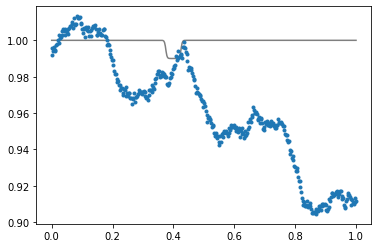

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import jax
from nuance.utils import transit
from tinygp import kernels, GaussianProcess

time = np.linspace(0, 1, 400)
diff_error = 0.001

kernel = kernels.quasisep.Cosine(0.3, 0.01) + kernels.quasisep.Exp(1., 0.02)
gp = GaussianProcess(kernel, time, mean=0., diag=diff_error**2)
variability = gp.sample(jax.random.PRNGKey(46), shape=(1,))[0]
X = np.vander(time, N=4, increasing=True)
w = [1., 0.004, -0.05, -0.05]
true = {"t0": 0.4, "D": 0.05, "d": 0.01}
true_transit = transit(time, **true)
diff_flux= variability +  true_transit + X@w
plt.plot(time, true_transit+1, c="k", alpha=0.5)

plt.plot(time, diff_flux, ".")

# Linear search

In [15]:
from nuance import Nuance

nu = Nuance(time, diff_flux, gp, X.T)

t0s = time.copy()
Ds = np.linspace(0.01, 0.1, 10)
ls, depths, depths_var = nu.linear_search(t0s, Ds)

  0%|          | 0/400 [00:00<?, ?it/s]

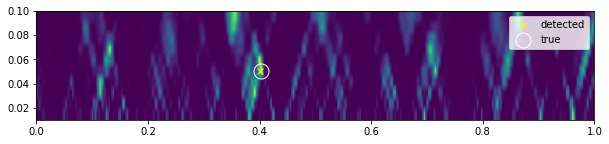

In [16]:
plt.figure(None, (10, 2))
extent = (t0s.min(), t0s.max(), Ds.min(), Ds.max())
i, j = np.unravel_index(np.argmax(ls), ls.shape)
plt.imshow(ls.T, aspect='auto', origin="lower", extent=extent)
plt.plot(true["t0"], true["D"], "x", c="yellow", label="detected")
plt.plot(t0s[i], Ds[j], "o", fillstyle="none", ms=15, c="w", label="true")
plt.legend()